source: https://www.kaggle.com/umerkk12/credit-card-predictive-analysis

References:

https://datatofish.com/k-means-clustering-python/

https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray

https://www.kaggle.com/ellecf/visualizing-multidimensional-clusters

https://community.greatlearning.in/t/while-using-pairplot-using-seaborn-package-i-am-getting-error-as-selected-kde-bandwidth-is-0-cannot-estiamte-density-can-someone-please-help-on-this/158/7

https://www.geeksforgeeks.org/python-seaborn-pairgrid-method/

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

# Credit Card Prediction Analysis!

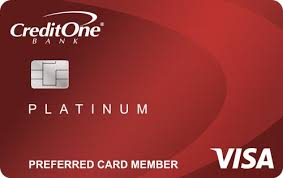

# Context

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.
 


# Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label.

# Following main steps were used:
* Fill missing values with mode
* Find correlation between features
* Oversample data set
* Use scaling (StandardScaler)
* Do ramdomizedSearchCV to select initialized parameters
* Plot learning curves over multiple iterations
* Plot validation curves over multiple iterations

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
!pip install pydotplus
import pydotplus
from IPython.display import Image
from sklearn.model_selection import learning_curve 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.manifold import TSNE
from sklearn.metrics import homogeneity_score

# Extracting data using two data sources

In [ ]:
app = pd.read_csv("../input/credit-card-approval-prediction/application_record.csv")
crecord = pd.read_csv("../input/credit-card-approval-prediction/credit_record.csv")

* Using different methods to understand data
* data is complex and both dataset need some kind of transformation before analysis
* datasets are indivudally dealt with and then eventually compiled using joins

In [ ]:
app.info()

In [ ]:
crecord.info()

In [ ]:
app['ID'].nunique() # the total rows are 438,557. This means it has duplicates

In [ ]:
crecord['ID'].nunique() 
# this has around 43,000 unique rows as there are repeating entries for different monthly values and status.

In [ ]:
len(set(crecord['ID']).intersection(set(app['ID']))) # checking to see how many records match in two datasets

In [ ]:
sns.heatmap(app.isnull()) # checking for null values. Seems like occupation_type has many

In [ ]:
sns.heatmap(crecord.isnull()) # checking for null values. All good here!

In [ ]:
app = app.drop_duplicates('ID', keep='last') 
# we identified that there are some duplicates in this dataset
# we will be deleting those duplicates and will keep the last entry of the ID if its repeated.

In [ ]:
app.drop('OCCUPATION_TYPE', axis=1, inplace=True) 
#we identified earlier that occupation_type has many missing values
# we will drop this column

In [ ]:
ot = pd.DataFrame(app.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type
#we are filtering the columns that have non numeric values to see if they are useful

In [ ]:
num_type = pd.DataFrame(app.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']
#HAVE CREATED SEPARATE LIST FOR NUMERIC TYPE INCASE IT WILL BE NEEDED IN FURTHER ANALYSIS
# IT IS NEEDED IN FURTHER ANALYSIS

In [ ]:
a = app[object_type]['CODE_GENDER'].value_counts()
b = app[object_type]['FLAG_OWN_CAR'].value_counts()
c = app[object_type]['FLAG_OWN_REALTY'].value_counts()
d = app[object_type]['NAME_INCOME_TYPE'].value_counts()
e = app[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = app[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = app[object_type]['NAME_HOUSING_TYPE'].value_counts()

print( a,"\n",b,'\n', c, '\n', d, '\n', e, '\n', f, '\n', g)

#this is just to see what each column is. 
#It seems that all of them are important since there is very fine classifcation in each column.
# their effectiveness cannot be judged at this moment so we convert all of them to numeric values.

In [ ]:
app.head(10)

In [ ]:
le = LabelEncoder()
for x in app:
    if app[x].dtypes=='object':
        app[x] = le.fit_transform(app[x])
# we have transformed all the non numeric data columns into data columns
# this method applies 0,1.. classification to different value types.

In [ ]:
app.head(10)

In [ ]:
app[num_type].head()
# We will look at numeric columns and see if there is anything that needs to be changed.

In [ ]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[0][2], color= 'orange')
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[2][2])

There are outliers in 3 columns.
1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. CNT_FAM_MEMBERS

* We need to remove these outliers to make sure they do not affect our model results. 
* We will now remove these outliers.

In [ ]:
# FOR CNT_CHILDREN COLUMN
q_hi = app['CNT_CHILDREN'].quantile(0.999)
q_low = app['CNT_CHILDREN'].quantile(0.001)
app = app[(app['CNT_CHILDREN']>q_low) & (app['CNT_CHILDREN']<q_hi)]

In [ ]:
# FOR AMT_INCOME_TOTAL COLUMN
q_hi = app['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app['AMT_INCOME_TOTAL'].quantile(0.001)
app= app[(app['AMT_INCOME_TOTAL']>q_low) & (app['AMT_INCOME_TOTAL']<q_hi)]

In [ ]:
#FOR CNT_FAM_MEMBERS COLUMN
q_hi = app['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app['CNT_FAM_MEMBERS'].quantile(0.001)
app= app[(app['CNT_FAM_MEMBERS']>q_low) & (app['CNT_FAM_MEMBERS']<q_hi)]

In [ ]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[0][2], color= 'orange')
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[2][2])

In [ ]:
crecord['Months from today'] = crecord['MONTHS_BALANCE']*-1
crecord = crecord.sort_values(['ID','Months from today'], ascending=True)
crecord.head(10)
# we calculated months from today column to see how much old is the month
# we also sort the data according to ID and Months from today columns.

In [ ]:
crecord['STATUS'].value_counts() 
# performed a value count on status to see how many values exist of each type

In [ ]:
crecord['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
crecord['STATUS'] = crecord['STATUS'].astype('int')
crecord['STATUS'] = crecord['STATUS'].apply(lambda x:1 if x >= 2 else 0)
# replace the value C and X with 0 as it is the same type
# 1,2,3,4,5 are classified as 1 because they are the same type
# these will be our labels/prediction results for our model

In [ ]:
crecord['STATUS'].value_counts(normalize=True) 
# there is a problem here
# the data is oversampled for the labels
# 0 are 99%
# 1 are only 1% in the whole dataset
# we will need to address the oversampling issue in order to make sense of our analysis
# this will be done after when we combine both the datasets
# so first we will join the datasets

In [ ]:
crecordgb = crecord.groupby('ID').agg(max).reset_index()
crecordgb.head() 
#we are grouping the data in crecord by ID so that we can join it with app

In [ ]:
df = app.join(crecordgb.set_index('ID'), on='ID', how='inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()
# no that this is joined, we will solve over sampling issue

df.info() # checking for number of rows. 
# there are 9516 rows.

In [ ]:
df.info() # checking for number of rows. 
# there are 9516 rows.

In [ ]:
X = df.iloc[:,1:-1] # X value contains all the variables except labels
y = df.iloc[:,-1] # these are the labels

In [ ]:
y

In [ ]:
X

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
# we create the test train split first

In [ ]:

ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)
# we have now fit and transform the data into a scaler for accurate reading and results.

In [ ]:

oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)
# we have addressed the issue of oversampling here

In [ ]:
y_train.value_counts()

In [ ]:
y_balanced.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
y_test_balanced.value_counts()

* We notice in the value counts above that label types are now balanced
* the problem of oversampling is solved now

# Algorithms code start below

PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=3)
principalComponents = pca.fit_transform(X_balanced)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, y_balanced], axis = 1)

In [ ]:
sns.scatterplot(x="principal component 1",y="principal component 2",hue='STATUS', data=finalDf)

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
 pca.explained_variance_ratio_.cumsum()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=3)
principalComponents = pca.fit_transform(X_balanced)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [ ]:
finalDf = pd.concat([principalDf, y_balanced], axis = 1)
finalDf

In [ ]:
%%time
from mpl_toolkits.mplot3d import Axes3D

# df = pd.read_csv('2016.csv')
# sns.set(style = "darkgrid")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = '3d')
colors = ("red", "green")
groups = (1,0) 

# X = finalDf['principal component 1']
# Y = finalDf['principal component 2']
# Z = finalDf['principal component 3']
# data=(X,Y,Z)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# ax.scatter(x, y, z)
for row in finalDf.iterrows():
    x, y, z = row[1]['principal component 1'],row[1]['principal component 2'],row[1]['principal component 3']
    if(row[1]['STATUS']==0.0):
#         print("0")
        ax.scatter(x, y, z,c="red" )
    else:
#         print("1")
        ax.scatter(x, y, z, c="blue")
    
plt.show()

In [ ]:
sns.pairplot(finalDf, hue='STATUS', vars=['principal component 1','principal component 2','principal component 3'])

# sns.pairplot(df_3d, hue='x')

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_.cumsum()

In [ ]:
finalDf

In [ ]:
# principalComponents = (...).fit_transform(X)
inverse_data = np.linalg.pinv(pca.components_.T)
reconstructed_data = principalComponents.dot(inverse_data)

In [ ]:
reconstructed_data

In [ ]:
reconstructed_data.shape

In [ ]:
X_balanced.shape

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(X_balanced, reconstructed_data,squared=True)
rmse

In [ ]:
rmseQueue=[]
varQueue=[]
from sklearn.metrics import mean_squared_error
for n in range(2,17):
    pca = PCA(n_components=n, random_state=3)
    principalComponents = pca.fit_transform(X_balanced)
    inverse_data = np.linalg.pinv(pca.components_.T)
    reconstructed_data = principalComponents.dot(inverse_data)
    rmse = mean_squared_error(X_balanced, reconstructed_data,squared=True)
#     print("PCA components: "+str(n)+", RMSE: "+str(rmse)+ ", PCA eigen values variance: " +str(pca.explained_variance_ratio_.cumsum()[-1]))
    print("PCA components: {0:2d}, RMSE: {1:0.3f}, PCA eigen values variance: {2:0.3f}".format(n,rmse,pca.explained_variance_ratio_.cumsum()[-1]))
    rmseQueue.append(rmse)
    varQueue.append(pca.explained_variance_ratio_.cumsum()[-1])

plt.plot(range(2,X_balanced.shape[1]+1), rmseQueue, 'bx-')
plt.xlabel('PCA components')
plt.ylabel('RMSE')
# plt.show()    
plt.grid()
plt.show()    

plt.plot(range(2,X_balanced.shape[1]+1), varQueue, 'bx-')
plt.xlabel('PCA components')
plt.ylabel('Variance')
# plt.show()    
plt.grid()
plt.show()

In [ ]:
# print("Second argument: {1:3d}, first one: {0:7.2f}".format(47.42, 11))

Choosing n_components to 11 as its giving .9 variance and .1 RMSE

In [ ]:
pca = PCA(n_components=11, random_state=3)
principalComponents = pca.fit_transform(X_balanced)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA '+a for a in [str(i) for i in range(1,pca.components_.shape[0]+1)]])

In [ ]:
pca.components_.shape[1]

In [ ]:
principalDf

Applying k means

In [ ]:
for i in range(2,13):
    labels=KMeans(n_clusters=i,random_state=3).fit(principalDf).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X_balanced,labels,random_state=3)))

choosing 7

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=3).fit(principalDf)
y_pred_kmeans = kmeans.predict(principalDf)

In [ ]:
labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeled_principalDf = pd.concat((principalDf,labels),axis=1)
labeled_principalDf = labeled_principalDf.rename({0:'labels'},axis=1)
labeled_principalDf

In [ ]:
m=TSNE(learning_rate=50, random_state=3 )
tsne_features = m.fit_transform(labeled_principalDf)
labeled_principalDf['t1']=tsne_features[:,0]
labeled_principalDf['t2']=tsne_features[:,1]

In [ ]:
labeled_principalDf

In [ ]:
finalDf = pd.concat([labeled_principalDf, y_balanced], axis = 1)
# finalDf = finalDf.rename({0:'labels'},axis=1)
sns.scatterplot(x="t1",y="t2",hue='STATUS', data=finalDf)
plt.show()

In [ ]:
finalDf = pd.concat([labeled_principalDf, y_balanced], axis = 1)
# finalDf = finalDf.rename({0:'labels'},axis=1)
sns.scatterplot(x="t1",y="t2",hue='labels', data=finalDf)
plt.show()

In [ ]:
homogeneity_score(y_balanced, y_pred_kmeans)